<a href="https://colab.research.google.com/github/mk688/IntravascularBrachytherapy/blob/master/VisualizeDoseXY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Visualize the dose scored from EGSnrc.
Location is fixed from -6 to 6 and the last row should be Air. 
The input file has to have the regions in the same order as specified in Location.

In [3]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True, font_scale=1.2)
import pandas.util.testing as tm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [11]:
# Upload output.txt file which contains the scored dose
# Make sure you use a unique file name especially when you upload an updated file. 
# It saves all files - doesn't overwrite it.

from google.colab import files
uploaded = files.upload()

print(uploaded)

Saving Stent175mm.txt to Stent175mm (1).txt
{'Stent175mm.txt': b'292 H2O521ICRU     1.000     0.0000 2.6801e-008 +/- 11.276 % 5.3668e-013 +/- 11.276 %\r\n298 H2O521ICRU     1.000     0.0000 4.2814e-008 +/- 9.532  % 8.5735e-013 +/- 9.532  %\r\n304 H2O521ICRU     1.000     0.0000 5.5779e-008 +/- 7.944  % 1.1170e-012 +/- 7.944  %\r\n310 H2O521ICRU     1.000     0.0000 7.5838e-008 +/- 7.393  % 1.5187e-012 +/- 7.393  %\r\n316 H2O521ICRU     1.000     0.0000 8.4491e-008 +/- 6.372  % 1.6919e-012 +/- 6.372  %\r\n322 H2O521ICRU     1.000     0.0000 1.1352e-007 +/- 5.952  % 2.2731e-012 +/- 5.952  %\r\n328 H2O521ICRU     1.000     0.0000 1.5039e-007 +/- 4.892  % 3.0115e-012 +/- 4.892  %\r\n334 H2O521ICRU     1.000     0.0000 1.7907e-007 +/- 4.610  % 3.5859e-012 +/- 4.610  %\r\n340 H2O521ICRU     1.000     0.0000 2.2702e-007 +/- 4.091  % 4.5462e-012 +/- 4.091  %\r\n346 H2O521ICRU     1.000     0.0000 2.6656e-007 +/- 3.791  % 5.3379e-012 +/- 3.791  %\r\n352 H2O521ICRU     1.000     0.0000 3.0524e-0

In [12]:
# Read output file from the EGSnrc program "Summary of region dosimetry per particle"
# Make sure to modify the name of objFile to match with your output file.

dicRow = {}
DoseTable = []

objFile = open('Stent175mm.txt','r')
for row in objFile:
  lstRow = row.split()
  dicRow = {"ir": int(lstRow[0]), "Dose Scored": float(lstRow[8])}
  DoseTable.append(dicRow)
objFile.close()


Run the following cell with the fixed Location only with the simulation output with the source at the center.  normDose should be defined with the dose scored at 2 mm when the source is positioned at the center

In [6]:
# RUN THIS CELL ONLY ONCE with the source at the center in Y axis.
# Location is fixed from -6 to 6 with an increment of 0.25

Location = np.arange(-6, 6.25, 0.25).tolist()
normIndex = Location.index(2)

# Normalize the dose such that Dose @ 2mm = 100%
normDose = DoseTable[normIndex]['Dose Scored']

In [13]:
# Normalize the dose based on the prescription dose (normDose) at 2mm with the assumption that the source is centered.

normDoseTable = []
for each in DoseTable:
  normDoseEach = (each['Dose Scored']/normDose)*100
  normDoseTable.append(normDoseEach)

In [14]:
# Preparation for the plots
# Plot normDoseTable (y-axis) vs. Location (x-axis)
indices = [i for i in range(len(normDoseTable)) if normDoseTable[i]>400 or normDoseTable[i]<1] 
LocationPlot = list(Location)
normDoseTablePlot = list(normDoseTable)
if indices:
  for each in indices:
    del LocationPlot[each]
    del normDoseTablePlot[each]
    indices[:] = [number-1 for number in indices]  


In [ ]:
# Specify the source position
sourcep = float(input('Enter the source position: '))

In [ ]:
stentp = float(input('Enter the stent location: '))

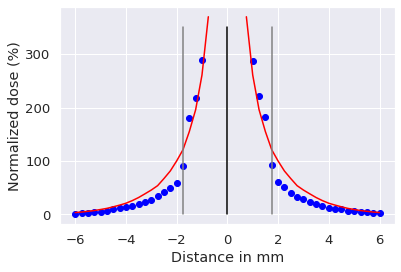

In [19]:
# Published PDD for Sr-90
xaxis1 = np.linspace(0.75, 6.0, 22, endpoint = True, retstep = False, dtype = None, axis =0 )
xaxis2 = np.linspace(-0.75, -6.0, 22, endpoint = True, retstep = False, dtype = None, axis =0 )
yaxis = [370, 261, 196, 155, 121, 100, 81.3, 67.1, 53.8, 45.6, 38.5, 31.6, 25.8, 20.9, 17.4, 14.2, 11.3, 9.2, 7.22, 5.83, 4.42, 3.54]

plt.plot(LocationPlot, normDoseTablePlot, 'o', color='blue')
plt.plot(xaxis1, yaxis, color='red')
plt.plot(xaxis2, yaxis, color='red')
plt.xlabel('Distance in mm')
plt.ylabel('Normalized dose (%)')
plt.grid(b=True, which='minor', alpha = 10, color='0.65', linestyle='-')
plt.plot([sourcep, sourcep], [0,350], color='black') # Source position
plt.plot([stentp, stentp], [0,350], color='grey') # Source position
plt.plot([-stentp, -stentp], [0,350], color='grey') # Source position
plt.show()